<a href="https://colab.research.google.com/github/Aaron-David-HdM/Applied-Data-Analytics/blob/main/UseCase_3/Durchfuehrung%20der%20Klassifikationsanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Git-Repository klonen sowie pullen**

In [94]:
!git clone https://github.com/Aaron-David-HdM/Applied-Data-Analytics.git

Cloning into 'Applied-Data-Analytics'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (293/293), done.
remote: Total 466 (delta 127), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (466/466), 2.94 MiB | 9.43 MiB/s, done.
Resolving deltas: 100% (184/184), done.


**Zu dem UseCase_3-Pfad wechseln**

In [95]:
%cd /content/Applied-Data-Analytics/UseCase_3

/content/Applied-Data-Analytics/UseCase_3


**Importieren von benötigten Bibliotheken sowie Lesen der CSV-Datei**

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

filepath = 'Einkommen_und_Verkaeufe.csv' # Bereinigte Daten für UseCase_3
df = pd.read_csv(filepath, decimal='.')

**Nicht benötigte 'Unnamed'-Spalte entfernt**

In [97]:
df.drop(columns= ['Unnamed: 0'], inplace = True)

**Die Werteverteilung der abhängigen Variable ausgeben**

In [98]:
df['Purchased'].value_counts()

0    711
1    289
Name: Purchased, dtype: int64

**Daten für Scikit learn vorbereiten**

In [99]:
X = df.drop(columns=['Purchased'])
y = df.Purchased

**Trainings- und Testdatensätze erstellen**

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1834)

**Erstellen eines neuen Trainingsdatensatzes für die Datenexploration**

In [101]:
train_dataset = pd.DataFrame(X_train).copy()
train_dataset['Purchased'] = pd.DataFrame(y_train)

train_dataset

,MonthlyIncome,Male,Age,Purchased
369,6082,1,29,0
239,927,1,29,0
269,322,0,32,1
360,4337,0,24,0
308,532,1,31,0
...,...,...,...,...
449,2149,0,30,0
962,7866,1,29,0
819,1440,0,29,0
821,2394,0,18,0


In [102]:
train_dataset['Purchased'].value_counts()
# 69
# 72

0    493
1    207
Name: Purchased, dtype: int64

**Explorative Datenanalyse**

In [103]:
train_dataset.groupby(by=['Purchased']).describe().T

Purchased                       0             1
MonthlyIncome count    493.000000    207.000000
              mean    3187.304260   3248.164251
              std     2464.604721   2303.867407
              min      107.000000    241.000000
              25%     1193.000000   1499.000000
              50%     2442.000000   2706.000000
              75%     4694.000000   4351.500000
              max    10426.000000  10225.000000
Male          count    493.000000    207.000000
              mean       0.480730      0.454106
              std        0.500136      0.499096
              min        0.000000      0.000000
              25%        0.000000      0.000000
              50%        0.000000      0.000000
              75%        1.000000      1.000000
              max        1.000000      1.000000
Age           count    493.000000    207.000000
              mean      25.756592     26.014493
              std        5.023682      5.041072
              min       18.000000     18.000000
              25%       21.000000     22.000000
              50%       26.000000     26.000000
              75%       30.000000     31.000000
              max       34.000000     34.000000

Käufer sind durchschnittlich 26 Jahre alt und verdienen monatlich etwa 61€ mehr als Nicht-Käufer. 

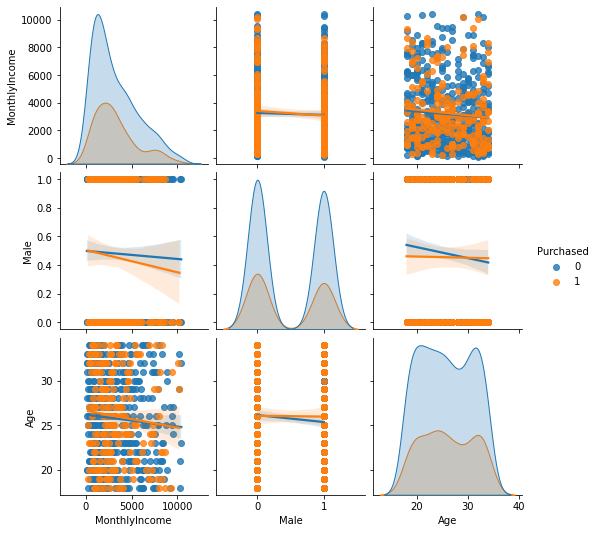

In [104]:
sns.pairplot(hue='Purchased', kind="reg", diag_kind="kde", data=train_dataset);

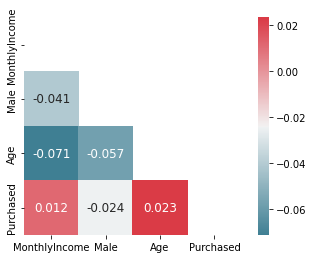

In [105]:
# Calculate correlation using the default method ( "pearson")
corr = train_dataset.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, annot_kws={"size": 12});